**Machine Learning Project by Team Maveriks**

Team members:
1. Md Saif Abdullah Biswas
   23092298
2. Tanvir Hossain
   23121478

Importing and Loading the Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving komuter_2025.csv to komuter_2025.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("komuter_2025.csv")

# Show the first few rows to understand the data
df.head()

,date,time,origin,destination,ridership
0,2025-01-01,00:00,Abdullah Hukum,Klang,1
1,2025-01-01,00:00,Abdullah Hukum,Telok Pulai,1
2,2025-01-01,00:00,Bangi,Batu Caves,1
3,2025-01-01,00:00,Bank Negara,Sungai Gadut,1
4,2025-01-01,00:00,Batu Tiga,Kampung Raja Uda,1


Preprocessing the Data

In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())

date           0
time           0
origin         0
destination    0
ridership      0
dtype: int64


In [ ]:
# Combine date and time into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Extract hour and day of the week from the datetime column
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Show the updated dataframe
df[['datetime', 'hour', 'day']].head()

,datetime,hour,day
0,2025-01-01,0,2
1,2025-01-01,0,2
2,2025-01-01,0,2
3,2025-01-01,0,2
4,2025-01-01,0,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create encoders for origin and destination
origin_encoder = LabelEncoder()
destination_encoder = LabelEncoder()

# Apply encoding to the origin and destination columns
df['origin_encoded'] = origin_encoder.fit_transform(df['origin'])
df['destination_encoded'] = destination_encoder.fit_transform(df['destination'])

# Show the encoded data to confirm
df[['origin', 'origin_encoded', 'destination', 'destination_encoded']].head()

,origin,origin_encoded,destination,destination_encoded
0,Abdullah Hukum,0,Klang,21
1,Abdullah Hukum,0,Telok Pulai,55
2,Bangi,3,Batu Caves,7
3,Bank Negara,4,Sungai Gadut,51
4,Batu Tiga,9,Kampung Raja Uda,18


Defining Features, Target and Splitting into Training and Testing Set

In [ ]:
# Define the features (X) and target (y)
X = df[['origin_encoded', 'destination_encoded', 'hour', 'day']]
y = df['ridership']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model 1# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the Linear Regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model by calculating the Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")

Linear Regression Mean Squared Error: 125.65717097748376


Model 2# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model by calculating the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")


Random Forest Mean Squared Error: 54.684865656607904


Model 3# K nearest neighbour


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN model
knn_model = KNeighborsRegressor()

# Train the model using the training data
knn_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model by calculating the Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Mean Squared Error: {mse_knn}")


K-Nearest Neighbors Mean Squared Error: 61.263783170391065


Model 4# MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create the Neural Network model
mlp_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Train the model using the training data
mlp_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model by calculating the Mean Squared Error (MSE)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"Neural Network Mean Squared Error: {mse_mlp}")

Neural Network Mean Squared Error: 109.07370289363486


Model 5# Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model by calculating the Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")


Decision Tree Mean Squared Error: 57.117089050342095


Comparing All models


In [ ]:
# Compare all model MSEs
mse_dict = {
    'Linear Regression': mse_lr,
    'Random Forest': mse_rf,
    'KNN': mse_knn,
    'Neural Network': mse_mlp,
    'Decision Tree': mse_dt
}

# Print the comparison
for model, mse in mse_dict.items():
    print(f'{model}: Mean Squared Error = {mse}')


Linear Regression: Mean Squared Error = 125.65717097748376
Random Forest: Mean Squared Error = 54.684865656607904
KNN: Mean Squared Error = 61.263783170391065
Neural Network: Mean Squared Error = 109.07370289363486
Decision Tree: Mean Squared Error = 57.117089050342095


Best performing model - Random Forest


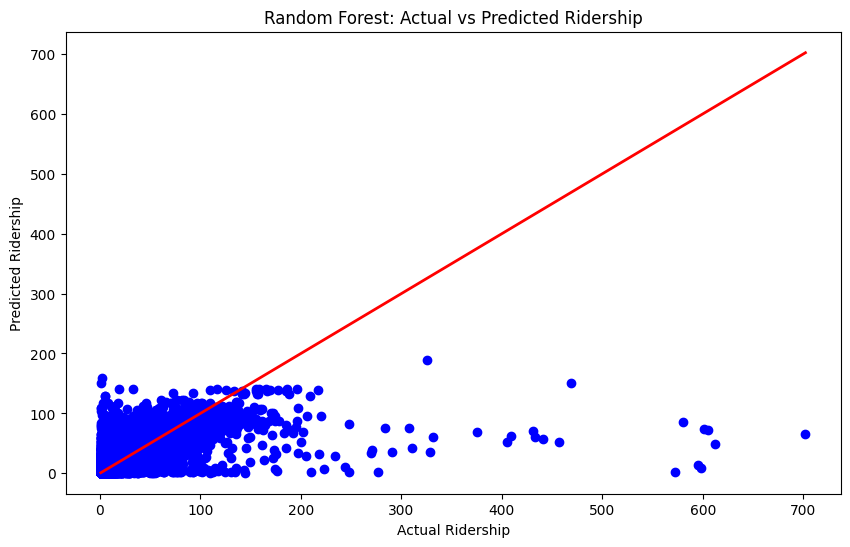

In [ ]:
# Use the trained Random Forest model to make predictions on new data
y_pred_rf_final = rf_model.predict(X_test)

# Display the predictions alongside the actual values
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_final, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Ridership')
plt.ylabel('Predicted Ridership')
plt.title('Random Forest: Actual vs Predicted Ridership')
plt.show()
